## La libreria pillow

Pillow es un *fork* de la libreria PIL (*Python Image Library*)
Con __pillow__ añadimos a Python la capacidad de procesar imágenes.

###  Instalacion de Pillow

Se puede instala con pip.

In [7]:
!pip3 install pillow

In [1]:
import PIL

### Características más importantes

- **Acepta múltiples formatos**: Pillow soporta muchos formatos de archivos
usados para almacenaminto de imágenes, entre otros BMP (*Windows Bitmaps*),
EPS (*Encapsulated Postscript*), GIF (*Graphics Interchange Format*),
ICO (*Windows Icons*), JPEG (*Joint Photographic Experts Group*), PNG
(*Portable Network Graphic*), TGA (*Truevision Graphics Adapter*),
TIFF (*Tagged Image File Format*)...

- **Un sistema muy eficiente** para representar las imágenes en memoria. La
  librería está diseñada para permitir un acceso rápido y eficiente a los
  pixels de las imágenes, lo que permite usarlo como una base de desarrollo
  para procesar imágenes.

- **Varios algoritmos** habituales del procesamiento de imágenes ya vienen
incluidos en la librería.

Algunos usos posibles de esta librería:

- Archivado y proceso de imágenes por lotes. La librería permite crear
  *thumbnails*, convertir entre formatos, rotar, cambiar el tamaño, 
  imprimir imágenes, etc.

- Presentar imágenes. La versión actual incluye una interfaz Tk, asi 
  como controles que pueden ser usados en otros sistemas de ventanas
  como PythonWin.

- Proceso de imágenes: La librería incluye operaciones básicas de
  modificación de imagenes, que funciona a nivel de pixels, y operaciones
  de más alto nivel, como filtros, nucleos de convolución y conversiones
  del espacio de colores.

- Análisis y síntesis de imágenes

### Primeros pasos: Usando la clase Image

La clase más importante dentro de la librería es la clase `Image`, definida
en el módulo con el mismo nombre. Podemos crear instancias de esta clase de
diversas formas, bien leyendo las imagenes de un fichero, procesando
otras imágenes, o creando una imagen desde cero.

Pare cargar una imagen desde disco, esamos la función `open()` dentro
del módulo `Image`:

In [2]:
from PIL import Image

im = Image.open("incredibles.webp")

En Jupyter notebook, podemos usar directamente la imagen como salida de una celda, solo hay que incluir la instancia al final de una celda.

In [20]:
from PIL import Image

im = Image.open("incredibles.webp")


In [3]:
im.show()

Si tiene éxito, la función devuelve un objeto de tipo `Image`. Podemos examinar
atributos de la instancia para obtener información adicional de la imagen:

In [15]:
from PIL import Image

im = Image.open("incredibles.webp")
print(im.format, im.size, im.mode)
type(im.size)

WEBP (600, 300) RGB


- El atributo `format` identifica el formato usado para almacenar la imagen (Si
la imagen no se ha creado a partir de un fichero, `format` vale `None`). 

- El atributo `size` es una dupla que contiene el ancho y alto de la imagen, en
*pixels*. 

- El atributo `mode` nos permite saber el número y nombre de las
bandas de la imagen, así como el tipo de pixel y la profundidad. 

Algunos valores habituales de `mode` son: __`L`__ (De luminancia) para imagenes
en escala de grises, __`RGB`__ para imagenes en color real, con 24 bits de
profundidad, y __`CMYK`__, que indica una imagen preparada para usarse en sistemas
de impresión.

Una vez que tenemos la instancia de la imagen, podemos usar los diferentes métodos definidos en la clase para procesar y
manipular las imágenes.

Por ejemplo, podemos mostrar la imagen llamando al métdodo `show`.

In [58]:
from PIL import Image

im = Image.open("incredibles.webp")
im.show()

**Pregunta**: ¿Cuál es el tamaño de la imagen `leon.jpg`? ¿Y cuál es su modo?

In [8]:
from PIL import Image

im = Image.open("leon.jpg")
print(f'Tamaño: {im.size[0]} x {im.size[1]}')
print(f'Modo: {im.mode}')

Tamaño: 640 x 960
Modo: RGB


In [7]:
!ls

incredibles.webp leon.jpg         pillow.ipynb     pillow.md


In [61]:
from PIL import Image

im = Image.open("leon.jpg")
print('Tamaño de la imagen:', im.size)
print('Modo de la imagen:', im.mode)

Tamaño de la imagen: (640, 960)
Modo de la imagen: RGB


### Teoría del Color

El ojo humano dispone de una serie de células especializadas en recibir
la luz, llamados conos. Hay tres tipos distintos de conos: los sensibles
a la luz roja, los sensibles a la luz azul y los sensibles a la luz
verde.

En realidad, solo vemos esos tres colores, llamados __colores primarios__. En resto de colores se obtiene como combinación de dos o más colores primarios. Por ejemplo, el violeta sería un __color secundario__, resultado de detectar a la vez tanto rojo como azul. Sumando el rojo y el verde obtenemos el amarillo.

Los colores primarios rojo, verde y azul funcionan como tales en un sistema aditivo, es decir, un sistema que *suma* los colores, como la pantalla de ordenador. En un sistema sustractivo, como el que utilizan los pintores al mezclar los pigmentos en su paleta, los colores se *restan*. En un sistema sustractivo, los colores primarios serían Magenta (que absorbe el verde), Amarillo (que absorbe el azul) y Cyan (que absorbe el rojo).

#### Modelo RGB

Así tenemos entonces los tres colores primarios del modelo RGB: rojo,
verde y azul o lo que es lo mismo con sus nombres en inglés; Red,
Green, Blue. Este sistema se basa en sumar la luz, de forma que la composición
de los tres colores daría el blanco.

#### Modelo CMYK

En el modelo CYM los tres colores primarios son Cián (*Cyan*), Amarillo (*Yellow*) y Magenta (*Magenta*) y la mezcla de estos tres colores a partes iguales da como resultado el color negro, debido a que cada adición sustrae luz. Este modelo es el utilizado en la industria gráfica y las artes visuales.

Pero conseguir el color negro, el más barato, a base de mezclar las tintas de colores, mucho mas caras, es de genero tonto. Así que lo que se hace en este mdelo es añadir el negro como color aparte, que se representa con la K final, aunque estrictamente hablando no es necesario.
 

#### Modelo  HSV

Por completar, veremos el modelo HSV (del inglés *Hue*, *Saturation*, *Value* – Matiz, Saturación, Valor), también llamado HSB (*Hue*, *Saturation*, *Brightness* – Matiz, Saturación, Brillo), define un modelo de color en términos de sus componentes.

![Modelo HSV](./HSV.png)

Em modelo HSV está diseñado desde el punto de vista de la utilidad. Es muy útil usar la ruleta de color HSV para elegir un color. En ella el matiz se representa por una región circular; una región triangular separada, puede ser usada para representar la saturación y el valor del color. Normalmente, el eje horizontal del triángulo denota la saturación, mientras que el eje vertical corresponde al valor del color. De este modo, un color puede ser elegido al tomar primero el matiz de una región circular, y después seleccionar la saturación y el valor del color deseados de la región triangular.

En lo que a nosotros respecta, como estamos usando pantallas de ordenador y, por tanto, estamos generando la luz mediante un sistema aditivo, el modelo RGB es el que nos interesa usar.

En resumen, todos los colores se obtienen como combinación de tres posibles valores. Por lo tanto, para representar una imagen en color, solo tenemos que almacenar los componentes rojo, verde y azul de cada punto que compone la imagen. Al igual que con las coordenadas, que podemos guardar en forma de tupla de dos elementos, los colores se pueden expresar en forma de trios o tuplas de tres elementos, cada uno indicando, por orden, el componente rojo, verde y azul del color.

Normalmente se usan un *byte*, o sea, 8 bits, para indicar cada componente del color, lo que nos da 256 tonalidades de rojo, 256 tonalidades de verde y 256 tonalidades de azul, y todas sus combinaciones, que son 256x256x255 o, lo que es lo mismo:

$$ 2^{24} = 16777216 $$

16.777.216 colores diferentes son muchos colores. En la práctica, esto es muchisimo más preciso de lo que el ojo humano puede percibir, por lo que a veces se llama a este esquema *True Color*.

También podemos definir colores usando una cuadrupla, una tupla de cuatro valores. Los tres primeros valores corresponden a los componentes RGB del color, en el cuarto se especifica la opacidad (lo contrario de transparencia) del color, también llamada __*alfa*__, __*valor alfa*__ o __*canal alfa*__.

Esto nos permite crear colores traslúcidos, que pueden dejar pasar parte de la luz que emiten los objetos que están detras de ellos. Un valor alfa de 255 se entiendo como totalmente opaco, una alfa de 0 es totalmente transparente; en la práctica, invisible.

### Leer imagenes desde un fichero

La librería soporta, como vimos antes, muchos formatos diferentes. Para leer
y obtener una imagen desde cualquiera de estos tipos de fichero, solo tenemos
que usar la función `open` en el módulo `Image`, como hicimos antes.

No tienes que preocuparte por
qué tipo de fichero es, porque la librería lo determina automáticamente basandose
en el propio contenido del fichero.

### Guardar una imagen a fichero

Para guardar un fichero, usamos el __método__ `save` de la propia imagen. Al
salvar la imagen, es importante el nombre del fichero, porque la librería determinará
el tipo del fichero a partir de la extensión del mismo, asi que si se usa el 
nombre `imagen.jpg` se usará un formato diferente que si usamos `imagen.png`.

**Ejercicio**: Convertir la imagen `leon.jpg` a un fichero de tipo PNG.

**Pista**: El mecanismo seria leer la  imagen a memoria, y luego salvarla pero
usando el nombre `leon.png`. La libreria usará la extensión para decidir
que formato de almacenamiento debe usar.

In [19]:
from PIL import Image

im = Image.open("leon.jpg")
im.save("leon.png")

In [20]:
!ls

HSV.png		   leon.jpg	      pillow.ipynb   rectangle.svg
cambia-formato.py  leon.png	      pillow.md      temp.py
incredibles.webp   lista-imagenes.py  rectangle.png


In [16]:
!rm leon.png

In [62]:
# %load cambia-formato.py

**Pregunta**: Como podriamos hacer para cambiar 4000 ficheros de tipo GIF que
tenemos en una carpeta a PNG? No hace falta escribir el programa, solo describir
lo que hariamos

### Crear *thumbnails* o (Para aficionados a la fotografia, copias de contacto)

Podemos usar el método `thumbnail` de la imagen para hacer una versión escalada
y más pequeña. El método acepta como parámetro una dupla o tupla de dos elementos,
que especifican el tamaño maximo de ancho y alto, respectivamente.

El escalado se hace manteniendo la proporcion original de la imagen, asi que 
probablemente el thumbnail solo tendra el tamaño indicado en la tupla para 
el ancho o para el alto. El otro valor se calculará automáticamente. Siempre
tenemos, eso si, la garanatía de que el ancho y alto del *thumbnail*
siempre será menor o igual que los máximos indicados

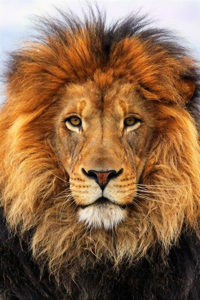

In [27]:
from PIL import Image

with Image.open("leon.jpg") as leon:
    size = (300, 300)
    leon.thumbnail(size)
leon

Una cosa a destacar es que el método `thumbnail` no nos devuelve una nueva imagen, sino
que modifica la imagen original, lo que se suele conocer como modificacion *in place*. La mayoría
de las funciones y mátodos funcionan asi, no obstante.

Otra cosa que conviene saber es que la libreria decodifica y carga la imagen __solo__
cuando no tiene más remedio (Esto se comoce como comportamiento *lazy*).

Esto significa
que, cuando abrimos la imagen con open, le lee la cabecera del fichero para determinar el
formato y obtener información como el modo, el tamaño y demás propiedades, pero el resto 
de los datos no se leen a no ser que alguna operación de procesamiento lo requiera (como el
método `thumbnail` que usamos antes).

Por tanto abrir una imagen es siempre una operacion muy rápida, y totalmente independiente
del tamaño el fichero o del tipo de compresion usado para almacenar la imagen.

**Ejercicio**: Escribir un pequeño script que liste las imagenes en el directorio
actual (puedes usar `os.listdir`)  que muestre sus dimensiones (El ancho y alto, que puedes
obtener como una tupla en la propiedad `size` de la imagen, y el modo de la
imagen (que puedes obtener del método `.mode`).

Puedes filtar el tipo de ficheros que puedes listar, usando `os.path.splitext(filename)`
y comprobando que la extension este en una lista predeterminada, como esta:

    IMAGE_EXTENSIONS = [".png", ".jpg", ".gif", ".webp"]

O puedes utilizar las excepciones. Para usar las excepciones, necesitas saber que si se
intenta abrir un fichero de algo que no es un fichero de imagen (un fichero `.py`, por
ejemplo) se elevará la excepción `IOError`. Podemos simplemente capturarla, ignorar
este fichero y pasar al siguiente.

In [42]:
from PIL import Image
import os

dir = os.listdir()
for img in dir:
    try:
        im = Image.open(img)
        print(f' {im.filename} {im.size[0]}x{im.size[1]} {im.mode}')
    except IOError:
        pass

 HSV.png 347x347 RGBA
 incredibles.webp 600x300 RGB
 leon.jpg 640x960 RGB
 leon.png 640x960 RGB
 rectangle.png 450x643 RGBA


In [20]:
# %load lista-imagenes.py

### Cortar, pegar y mezclar imágenes

La clase `Image` contiene métodos que te permiten manipular partes de una imagen. Podemos, por
ejemplo, extraer un sub-rectangulo de una imagen, usando el método `crop`. El parámetro
de entrada es una cuadrupla (tupla de cuatro elementos), que contiene, en este orden:

- valor minimo de x, o `left`
- valor minimo de y, o `upper`
- valor máximo de x, o `right`
- valor máximo de y, o `bottom`

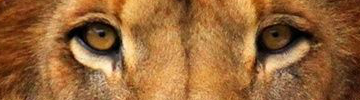

In [57]:
from PIL import Image

with Image.open("leon.jpg") as leon:
    box = (140, 350, 500, 450)
    region = leon.crop(box)
region

Observa que en este caso no se transforma la imagen original, como en `thumbnail`, sino que
se crea una imagen totalmente nueva. En el siguiente diagrma se muestra el significado de cada
uno de los valores de la 4-tupla.

![crop](rectangle.png)

El sistema de coordenadas de Pillow pone el origen (0, 0) en la esquina superior izquierda.
Como las coordenadas empiezan en cero, es bueno pensar que las posiciones apuntan
a los valores entre los pixel, y no a los pixels en si. Por tanto, la imagen
recortada tiene un tamaño de 150xs150 pixels exactamente.

In [52]:
from PIL import Image

with Image.open("leon.jpg") as leon:
    box = (150, 300, 300, 450)
    region = leon.crop(box)
    
region.size

(150, 150)

### Procesar la imagen y pegarla de nuevo

Vamos a realizar algun cambio en esta nueva imagen. En este caso vamos
a usar el método `transpose` para rotar la imagen 180 grados. Después, 
pegaremos esta imagen rotada en la imagen original, usando el metodo `.paste`
de la misma.

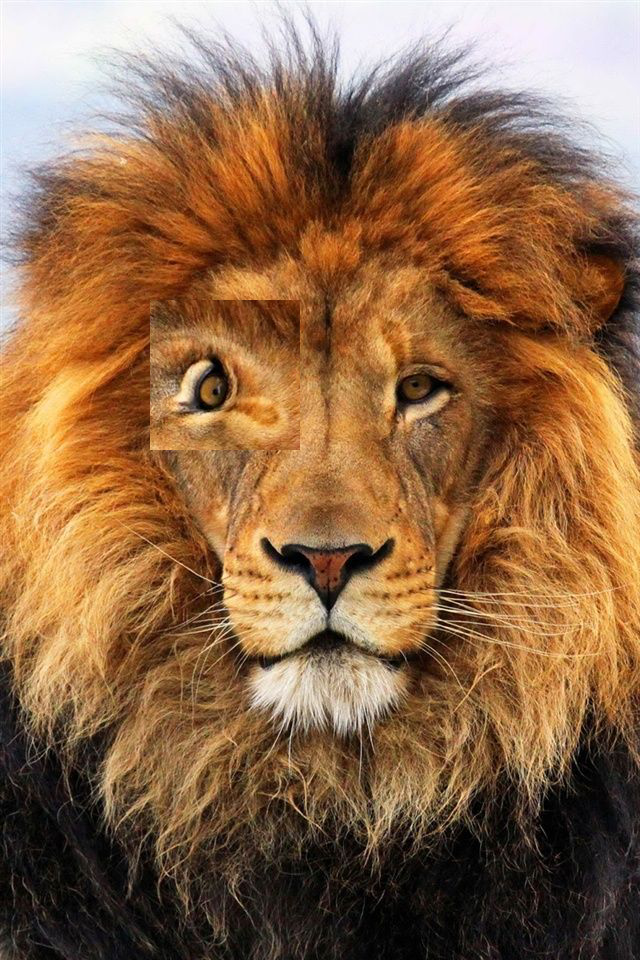

In [61]:
from PIL import Image

leon = Image.open("leon.jpg")
box = (150, 300, 300, 450)
region = leon.crop(box)
region = region.transpose(Image.ROTATE_270)
leon.paste(region, box)
leon

Al pegar la imagen, indicamos la imagen a pegar y el rectangulo donde pegarla, y
el tamaño de las dos debe ser el mismo, si no se elevará un error. Además, no se puede
pegar una imagen de forma que ocupe más que el tamaño de la imagen original.

no tenemos que preocuparnos, sin embargo, si los modos de la imagen pegada y destino
no coinciden, la libreria hara las conversiones necesarias automaticamente.

### Descomponer una imagen en color en RGB

El método `split` nos permite dividir una imagen en los canales básicos R, G, B, devolviendos
tres imagenes, cada una de las cuales contienen los valores para cada color. Podemos
reunificar esas tres imagenenes de nuevo con la función `merge`.

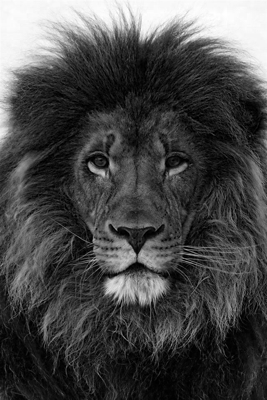

In [65]:
from PIL import Image

leon = Image.open("leon.jpg")
leon.thumbnail((300, 400))
red, green, blue = leon.split()
    
blue

El metodo `merge` espera dos parámetros, el primero es el modo (es este caso, `RGB`) y luego las
tres bandas con las que debe remezclar la imagen, en forma de tupla de tres elementos). Si mezclamos las
bandas en el orden correcto, obtenemos la misma imagen.

**Ejercicio**: Mezcla las tres bandas obtenidas antes (`red`, `green`, `blue`) ejecuntando
    la siguiente celda, y comprueba que volvemos a tener la imagen original. Despues, cambia el orden
    de las bandas (`blue`, `green`, `red`, por ejemplo) y observa el efecto

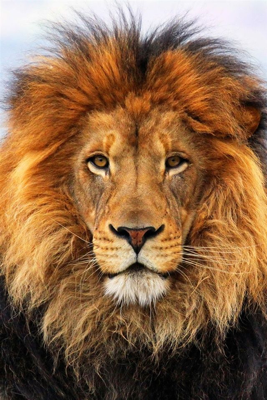

In [72]:
from PIL import Image

leon = Image.open("leon.jpg")
leon.thumbnail((300, 400))
red, green, blue = leon.split()
rebuild = Image.merge("RGB", (red, green, blue))
rebuild

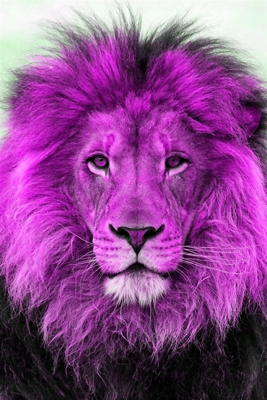

In [75]:
wrong_colors = Image.merge("RGB", (red, blue, red))
wrong_colors

### Transformaciones geométricas

Podemos realizar algunas transformaciones geométricas sencillas
incluidas en la propia clase `Image`. Por ejemplo, `resize` nos 
permite cambiar el tamaño de la imagen. Al contrario que `thumbnail`, no
respetara las proporciones actuales, si el nuevo tamaño no la hace, y
no hace el cambio *in place*, sino que crea una nueva imagen con el nuevo tamaño:
    
    

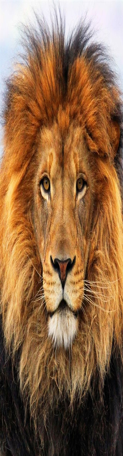

In [4]:
from PIL import Image

leon = Image.open("leon.jpg")
deformed = leon.resize((123, 456))
deformed

Para rotar las imágenes, podemos usar el método `rotate` o, como hicimos antes, `transpose`. Este
último puede ser usado también para reflejar la imagen a lo largo de su eje vertical u horizontal.

    out = im.transpose(Image.FLIP_LEFT_RIGHT)
    out = im.transpose(Image.FLIP_TOP_BOTTOM)
    out = im.transpose(Image.ROTATE_90)
    out = im.transpose(Image.ROTATE_180)
    out = im.transpose(Image.ROTATE_270)
    
Usando el *flag* `expand` (por defecto a False), podemos indicar si queremos 
expandir la imagen paa que la rotación se produzca con
o sin perdida.

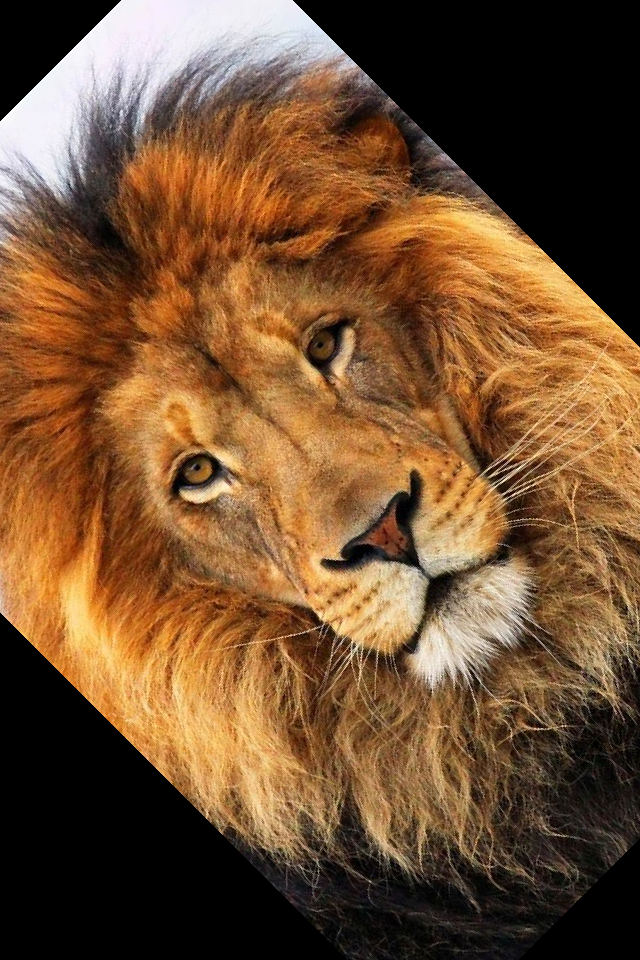

In [90]:
from PIL import Image

with Image.open("leon.jpg") as leon:
    rotated = leon.rotate(45)
rotated